**Outline**  
  
* **1. Basic understanding of the data**  
  
  
* **2. Preprocessing**  
a) Scaling and Distributing    
b) Splitting the Data
  

* **3. Random UnderSampling**  
a) Equally Distributing and Correlating  
b) Anomaly Detection  
c) Dimensionality Reduction and Clustering  
d) Classifier  
e) A Deeper Look Into Logistic Regression  
f) OverSampling with SMOTE
    
      
      
* **4. Testing**  
a) Test for Logistic Regression. 
b) Naive Neural Networks on the Test Set  
c) Other Models Testing    

  
* **5. Summary**    
  
  
  
* **6. Validation**

# Basic understanding of the data

In [145]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('model.csv')

In [3]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [4]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,...,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,...,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [6]:
data.isnull().sum().max()

0

In [7]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'default'],
      dtype='object')

In [8]:
print('Non-Dault', round(data['default'].value_counts()[0] / len(data) * 100,2), '% of the dataset')
print('Default', round(data['default'].value_counts()[1] / len(data) * 100,2), '% of the dataset')

Non-Dault 95.74 % of the dataset
Default 4.26 % of the dataset


We can see that there is no missing values in the dataset and this is a quite imbalanced dataset.

Text(0.5, 1.0, 'Default Distributions \n (0: Non-default || 1: Default)')

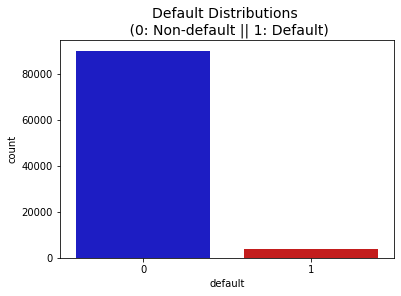

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('default', data=data, palette=colors)
plt.title('Default Distributions \n (0: Non-default || 1: Default)', fontsize=14)

# Preprocessing

## Scaling and Distributing

As the describe of the data suggests, the mean and standard deviation of each feature (A1 - A30) varies a lot. So we better take some scaling regulation on the original dataset.  

Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

features = data.columns[:30]

for feature in features:
    data[feature] = rob_scaler.fit_transform(data[feature].values.reshape(-1,1))
    
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,0.013580,-0.048888,0.010762,0.220501,0.060363,0.069322,0.081860,-0.078137,0.038919,0.011310,...,0.634780,0.855000,0.353681,0.544138,0.461976,0.526285,0.350307,0.526306,0.772322,0.042553
std,0.783336,0.812825,0.838816,1.139077,0.974375,0.944140,0.839498,0.826759,0.980820,0.913358,...,1.976520,2.005184,2.907756,1.958220,1.241531,1.229921,1.081484,1.800317,1.822672,0.201849
min,-1.429251,-5.961575,-2.303931,-1.648374,-2.681669,-2.388040,-1.183333,-3.175245,-2.104798,-1.959384,...,-0.571429,-2.000000,-3.000000,-1.125000,-2.279145,-1.044774,-5.362491,-14.362020,-14.434094,0.000000
25%,-0.517241,-0.502343,-0.527146,-0.439466,-0.481997,-0.475748,-0.500000,-0.604217,-0.498737,-0.558824,...,-0.285714,0.000000,-1.000000,-0.375000,-0.302886,-0.210474,-0.352271,-0.301205,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.482759,0.497657,0.472854,0.560534,0.518003,0.524252,0.500000,0.395783,0.501263,0.441176,...,0.714286,1.000000,0.000000,0.625000,0.697114,0.789526,0.647729,0.698795,1.000000,0.000000
max,6.027348,1.465792,6.023545,22.015660,9.265957,7.312957,14.375000,9.901054,53.450758,59.665266,...,75.285714,70.000000,168.000000,49.875000,39.915348,39.930631,25.452980,187.935456,270.483831,1.000000


## Splitting the Data

Before proceeding with the **Random UnderSampling technique**, I will separate the orginal dataframe.    
  
  
For testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.     

The main goal is to fit the model either with the dataframes that were undersample or oversample (in order for our models to detect the pattern of default), and test it on the original testing set.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Non-Dault', round(data['default'].value_counts()[0] / len(data) * 100,2), '% of the dataset')
print('Default', round(data['default'].value_counts()[1] / len(data) * 100,2), '% of the dataset')

Non-Dault 95.74 % of the dataset
Default 4.26 % of the dataset


In [12]:
X = data.drop('default', axis = 1)
y = data['default']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [18000 18001 18002 ... 93997 93998 93999] Test: [    0     1     2 ... 90797 90798 90799]
Train: [    0     1     2 ... 93997 93998 93999] Test: [18000 18001 18002 ... 91597 91598 91599]
Train: [    0     1     2 ... 93997 93998 93999] Test: [36000 36001 36002 ... 92397 92398 92399]
Train: [    0     1     2 ... 93997 93998 93999] Test: [54000 54001 54002 ... 93197 93198 93199]
Train: [    0     1     2 ... 93197 93198 93199] Test: [72000 72001 72002 ... 93997 93998 93999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.95744681 0.04255319]
[0.95744681 0.04255319]


# Random UnderSampling

In [13]:
data['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

In [14]:
# Shuffle the data before creating the subsamples

df = data.sample(frac = 1)

# amount of default cases of 4000
default_df = df.loc[df['default'] == 1]
non_default_df = df.loc[df['default'] == 0][:4000]

normal_dist_df = pd.concat([default_df, non_default_df])

#Shuffle again
new_df = normal_dist_df.sample(frac = 1, random_state = 42)

new_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
90038,0.787158,-0.654171,-1.739089,-1.220016,0.895254,1.410631,0.100000,-0.827001,-1.473485,-1.259104,...,-0.428571,0.0,-1.0,-0.125,-0.180748,-0.210474,-0.347747,-0.301205,0.931161,1
90094,0.671819,-0.494845,-0.970647,-0.276889,0.734861,0.452492,1.383333,-0.613139,-1.262626,-1.959384,...,0.857143,2.0,1.0,0.500,0.321064,0.481261,0.117397,1.429432,0.000000,1
90234,0.995244,-0.080600,-0.864017,-0.530419,-0.479542,-0.177409,0.300000,-0.713706,-0.463384,-0.138655,...,0.285714,2.0,1.0,0.125,1.228855,-0.210474,0.217252,2.709983,3.782602,1
90738,2.375743,-1.755389,-1.714951,-0.911913,2.621113,1.648505,7.400000,-0.545012,-0.842172,-1.959384,...,10.000000,9.0,13.0,1.625,1.562020,-0.210474,2.829361,0.039300,0.274354,1
67312,0.562426,-0.402999,-0.454570,-0.461977,0.869885,1.548837,-0.108333,0.474889,0.059343,0.441176,...,0.142857,0.0,-1.0,0.000,-0.108801,0.016002,-0.374496,-0.047619,0.000000,0


## Equally Distributing and Correlating

Distribution of the Default classes in the subsample dataset
1    0.5
0    0.5
Name: default, dtype: float64


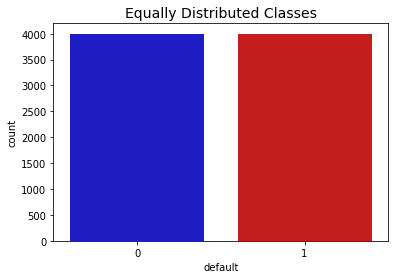

In [15]:
print('Distribution of the Default classes in the subsample dataset')
print(new_df['default'].value_counts() / len(new_df))

sns.countplot('default', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

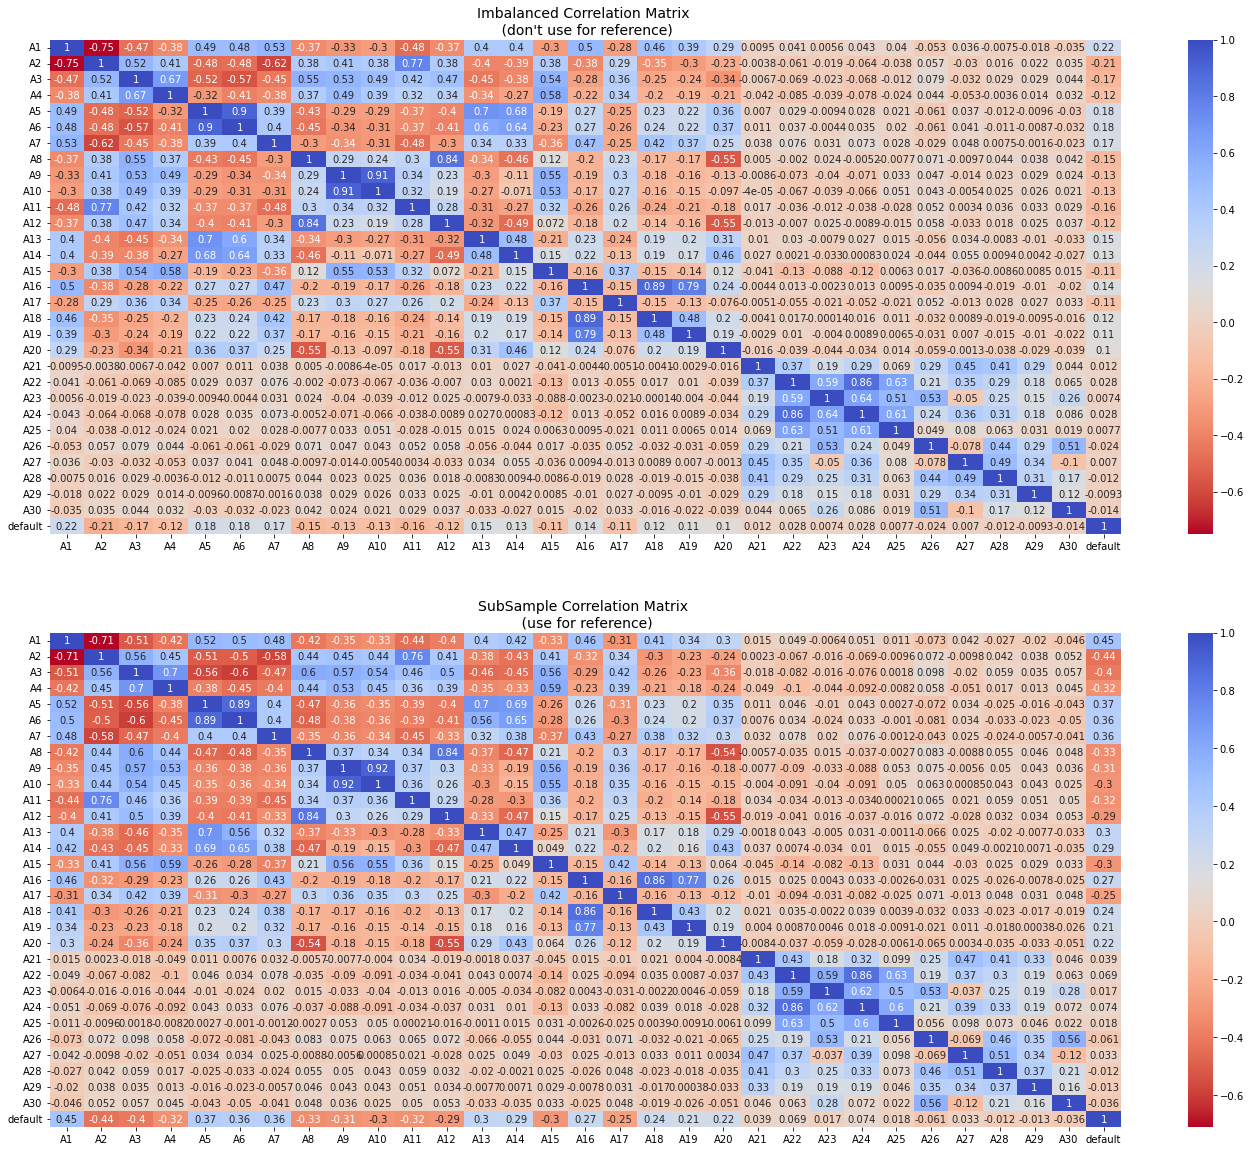

In [16]:
# Correlation Matrices

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot = True, annot_kws={'size':10}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Subsample
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot = True, annot_kws={'size':10}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

* **Negative Correlation:** A2, A3, A4, A8 and A11 are negatively correlated. The lower these values are, the more likely the result will be a default transaction.   
  
  
* **Positive Correlation:** A1, A5, A6 and A7 are positively correlated. The higher these values are, the more likely the result will be a default transaction.

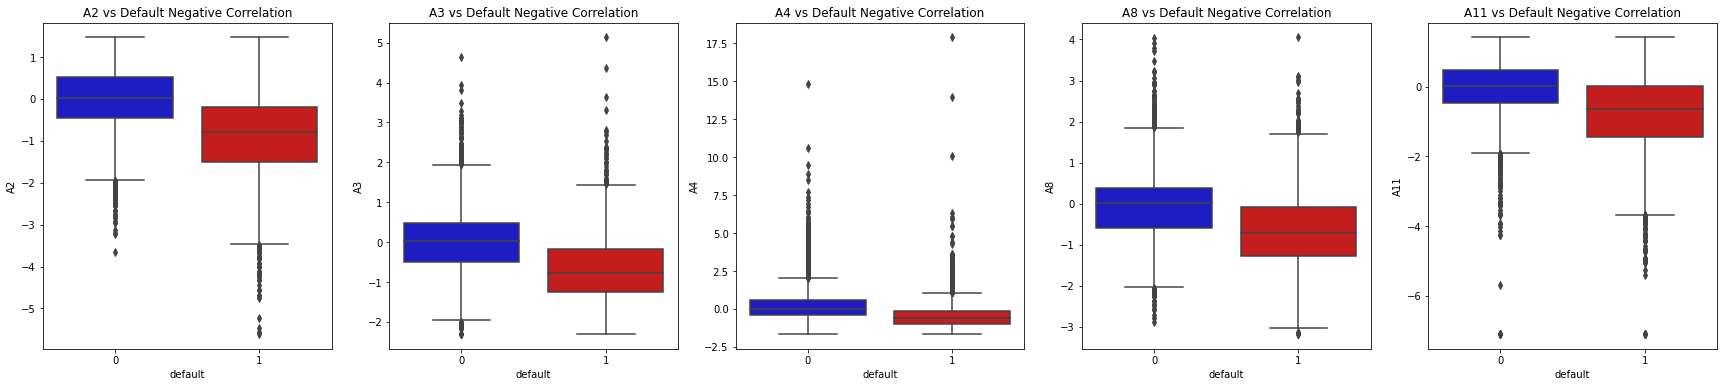

In [17]:
f, axes = plt.subplots(ncols=5, figsize=(30,6))

# Negative Correlations with our default (The lower our feature value the more likely it will be a default transaction)
sns.boxplot(x="default", y="A2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('A2 vs Default Negative Correlation')

sns.boxplot(x="default", y="A3", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('A3 vs Default Negative Correlation')

sns.boxplot(x="default", y="A4", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('A4 vs Default Negative Correlation')

sns.boxplot(x="default", y="A8", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('A8 vs Default Negative Correlation')

sns.boxplot(x="default", y="A11", data=new_df, palette=colors, ax=axes[4])
axes[4].set_title('A11 vs Default Negative Correlation')

plt.show()

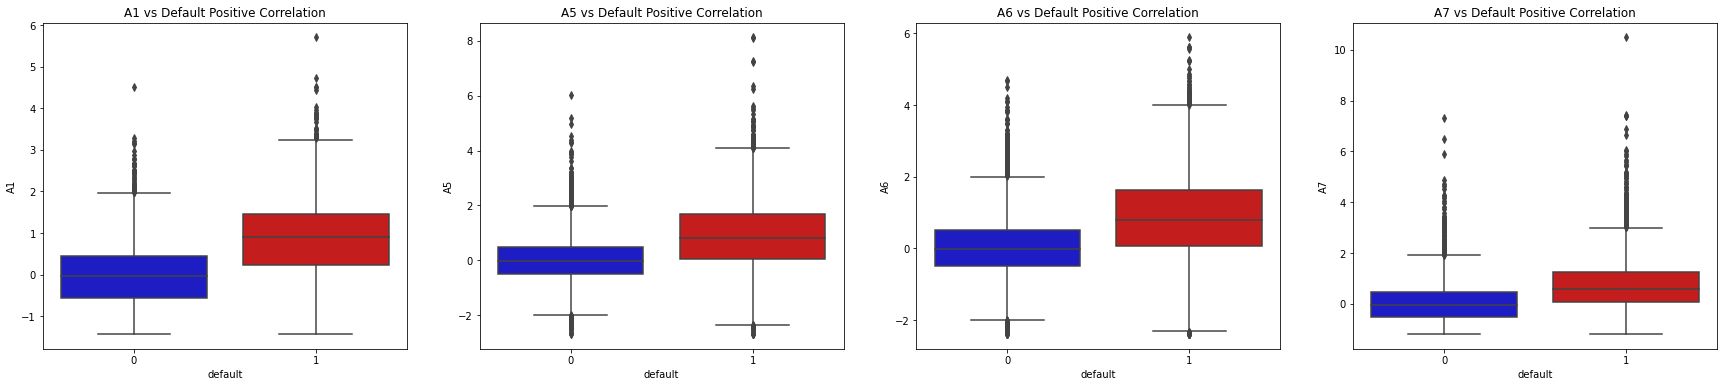

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(30,6))

# Positive Correlations with our default (The higher our feature value the more likely it will be a default transaction)
sns.boxplot(x="default", y="A1", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('A1 vs Default Positive Correlation')

sns.boxplot(x="default", y="A5", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('A5 vs Default Positive Correlation')

sns.boxplot(x="default", y="A6", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('A6 vs Default Positive Correlation')

sns.boxplot(x="default", y="A7", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('A7 vs Default Positive Correlation')

plt.show()

## Anomaly Detection

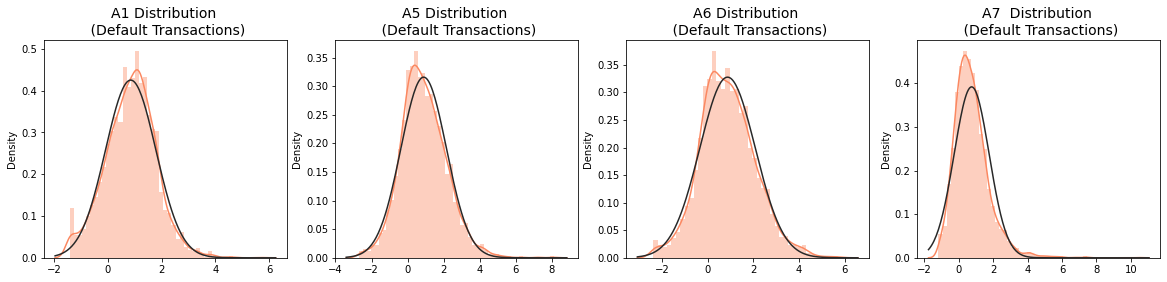

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 4))

a1_default_dist = new_df['A1'].loc[new_df['default'] == 1].values
sns.distplot(a1_default_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('A1 Distribution \n (Default Transactions)', fontsize=14)

a5_default_dist = new_df['A5'].loc[new_df['default'] == 1].values
sns.distplot(a5_default_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('A5 Distribution \n (Default Transactions)', fontsize=14)

a6_default_dist = new_df['A6'].loc[new_df['default'] == 1].values
sns.distplot(a6_default_dist,ax=ax3, fit=norm, color='#FB8861')
ax3.set_title('A6 Distribution \n (Default Transactions)', fontsize=14)

a7_default_dist = new_df['A7'].loc[new_df['default'] == 1].values
sns.distplot(a7_default_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('A7  Distribution \n (Default Transactions)', fontsize=14)

plt.show()

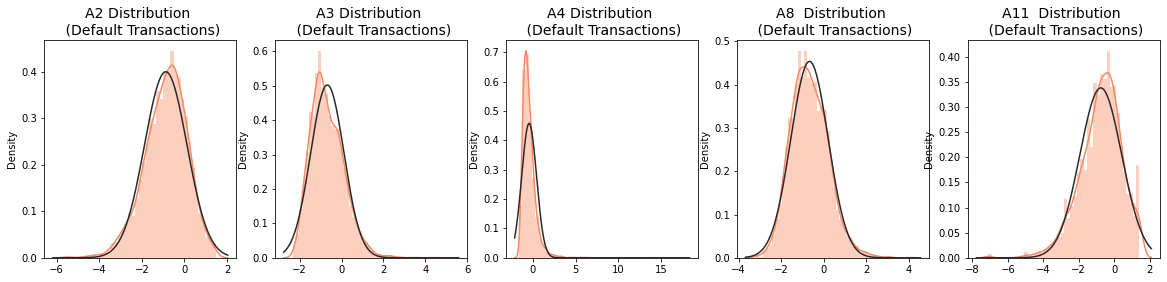

In [20]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 4))

a2_default_dist = new_df['A2'].loc[new_df['default'] == 1].values
sns.distplot(a2_default_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('A2 Distribution \n (Default Transactions)', fontsize=14)

a3_default_dist = new_df['A3'].loc[new_df['default'] == 1].values
sns.distplot(a3_default_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('A3 Distribution \n (Default Transactions)', fontsize=14)

a4_default_dist = new_df['A4'].loc[new_df['default'] == 1].values
sns.distplot(a4_default_dist,ax=ax3, fit=norm, color='#FB8861')
ax3.set_title('A4 Distribution \n (Default Transactions)', fontsize=14)

a8_default_dist = new_df['A8'].loc[new_df['default'] == 1].values
sns.distplot(a8_default_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('A8  Distribution \n (Default Transactions)', fontsize=14)

a11_default_dist = new_df['A11'].loc[new_df['default'] == 1].values
sns.distplot(a11_default_dist,ax=ax5, fit=norm, color='#FB8861')
ax5.set_title('A11  Distribution \n (Default Transactions)', fontsize=14)

plt.show()

In [21]:
# A1 Removing Outliers
print('Removing outliers for A1')
a1_default = new_df['A1'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a1_default, 25), np.percentile(a1_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a1_iqr = q75 - q25
print('iqr: {}'.format(a1_iqr))

a1_cut_off = a1_iqr * 1.5
a1_lower, a1_upper = q25 - a1_cut_off, q75 + a1_cut_off
print('Cut Off: {}'.format(a1_cut_off))
print('A1 Lower: {}'.format(a1_lower))
print('A1 Upper: {}'.format(a1_upper))

outliers = [x for x in a1_default if x < a1_lower or x > a1_upper]
print('Feature A1 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A1'] > a1_upper) | (new_df['A1'] < a1_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A5 Removing Outliers
print('Removing outliers for A5')
a5_default = new_df['A5'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a5_default, 25), np.percentile(a5_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a5_iqr = q75 - q25
print('iqr: {}'.format(a5_iqr))

a5_cut_off = a5_iqr * 1.5
a5_lower, a5_upper = q25 - a5_cut_off, q75 + a5_cut_off
print('Cut Off: {}'.format(a5_cut_off))
print('A5 Lower: {}'.format(a5_lower))
print('A5 Upper: {}'.format(a5_upper))

outliers = [x for x in a5_default if x < a5_lower or x > a5_upper]
print('Feature A5 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A5'] > a5_upper) | (new_df['A5'] < a5_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A6 Removing Outliers
print('Removing outliers for A6')
a6_default = new_df['A6'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a6_default, 25), np.percentile(a6_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a6_iqr = q75 - q25
print('iqr: {}'.format(a6_iqr))

a6_cut_off = a6_iqr * 1.5
a6_lower, a6_upper = q25 - a6_cut_off, q75 + a6_cut_off
print('Cut Off: {}'.format(a6_cut_off))
print('A6 Lower: {}'.format(a6_lower))
print('A6 Upper: {}'.format(a6_upper))

outliers = [x for x in a6_default if x < a6_lower or x > a6_upper]
print('Feature A6 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A6'] > a6_upper) | (new_df['A6'] < a6_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A7 Removing Outliers
print('Removing outliers for A7')
a7_default = new_df['A7'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a7_default, 25), np.percentile(a7_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a7_iqr = q75 - q25
print('iqr: {}'.format(a7_iqr))

a7_cut_off = a7_iqr * 1.5
a7_lower, a7_upper = q25 - a7_cut_off, q75 + a7_cut_off
print('Cut Off: {}'.format(a7_cut_off))
print('A7 Lower: {}'.format(a7_lower))
print('A7 Upper: {}'.format(a7_upper))

outliers = [x for x in a7_default if x < a7_lower or x > a7_upper]
print('Feature A7 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A7'] > a7_upper) | (new_df['A7'] < a7_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

Removing outliers for A1
Quartile 25: 0.24227110582639733 | Quartile 75: 1.4482758620689657
iqr: 1.2060047562425684
Cut Off: 1.8090071343638527
A1 Lower: -1.5667360285374554
A1 Upper: 3.2572829964328185
Feature A1 Outliers for Default Cases: 37
Number of Instances after outliers removal: 7961
----------------------------------------------------------------------------------------------------
Removing outliers for A5
Quartile 25: 0.05891980360065427 | Quartile 75: 1.6554828150572825
iqr: 1.5965630114566283
Cut Off: 2.3948445171849424
A5 Lower: -2.335924713584288
A5 Upper: 4.050327332242225
Feature A5 Outliers for Default Cases: 75
Number of Instances after outliers removal: 7860
----------------------------------------------------------------------------------------------------
Removing outliers for A6
Quartile 25: 0.06162790697674421 | Quartile 75: 1.5931893687707646
iqr: 1.5315614617940203
Cut Off: 2.2973421926910307
A6 Lower: -2.2357142857142867
A6 Upper: 3.8905315614617955
Feature A

In [22]:
# A2 Removing Outliers
print('Removing outliers for A2')
a2_default = new_df['A2'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a2_default, 25), np.percentile(a2_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a2_iqr = q75 - q25
print('iqr: {}'.format(a2_iqr))

a2_cut_off = a2_iqr * 1.5
a2_lower, a2_upper = q25 - a2_cut_off, q75 + a2_cut_off
print('Cut Off: {}'.format(a2_cut_off))
print('A2 Lower: {}'.format(a2_lower))
print('A2 Upper: {}'.format(a2_upper))

outliers = [x for x in a2_default if x < a2_lower or x > a2_upper]
print('Feature A2 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A2'] > a2_upper) | (new_df['A2'] < a2_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A3 Removing Outliers
print('Removing outliers for A3')
a3_default = new_df['A3'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a3_default, 25), np.percentile(a3_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a3_iqr = q75 - q25
print('iqr: {}'.format(a3_iqr))

a3_cut_off = a3_iqr * 1.5
a3_lower, a3_upper = q25 - a3_cut_off, q75 + a3_cut_off
print('Cut Off: {}'.format(a3_cut_off))
print('A3 Lower: {}'.format(a3_lower))
print('A3 Upper: {}'.format(a3_upper))

outliers = [x for x in a3_default if x < a3_lower or x > a3_upper]
print('Feature A3 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A3'] > a3_upper) | (new_df['A3'] < a3_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A4 Removing Outliers
print('Removing outliers for A4')
a4_default = new_df['A4'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a4_default, 25), np.percentile(a4_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a4_iqr = q75 - q25
print('iqr: {}'.format(a4_iqr))

a4_cut_off = a4_iqr * 1.5
a4_lower, a4_upper = q25 - a4_cut_off, q75 + a4_cut_off
print('Cut Off: {}'.format(a4_cut_off))
print('A4 Lower: {}'.format(a4_lower))
print('A4 Upper: {}'.format(a4_upper))

outliers = [x for x in a4_default if x < a4_lower or x > a4_upper]
print('Feature A4 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A4'] > a4_upper) | (new_df['A4'] < a4_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A8 Removing Outliers
print('Removing outliers for A8')
a8_default = new_df['A8'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a8_default, 25), np.percentile(a8_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a8_iqr = q75 - q25
print('iqr: {}'.format(a8_iqr))

a8_cut_off = a8_iqr * 1.5
a8_lower, a8_upper = q25 - a8_cut_off, q75 + a8_cut_off
print('Cut Off: {}'.format(a8_cut_off))
print('A8 Lower: {}'.format(a8_lower))
print('A8 Upper: {}'.format(a8_upper))

outliers = [x for x in a8_default if x < a8_lower or x > a8_upper]
print('Feature A8 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A8'] > a8_upper) | (new_df['A8'] < a8_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

# A11 Removing Outliers
print('Removing outliers for A11')
a11_default = new_df['A11'].loc[new_df['default'] == 1].values
q25, q75 = np.percentile(a11_default, 25), np.percentile(a11_default, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
a11_iqr = q75 - q25
print('iqr: {}'.format(a11_iqr))

a11_cut_off = a11_iqr * 1.5
a11_lower, a11_upper = q25 - a11_cut_off, q75 + a11_cut_off
print('Cut Off: {}'.format(a11_cut_off))
print('A11 Lower: {}'.format(a11_lower))
print('A11 Upper: {}'.format(a11_upper))

outliers = [x for x in a11_default if x < a11_lower or x > a11_upper]
print('Feature A11 Outliers for Default Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['A11'] > a11_upper) | (new_df['A11'] < a11_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('--' * 50)

Removing outliers for A2
Quartile 25: -1.4299437675726334 | Quartile 75: -0.16119962511715075
iqr: 1.2687441424554826
Cut Off: 1.9031162136832238
A2 Lower: -3.3330599812558575
A2 Upper: 1.741916588566073
Feature A2 Outliers for Default Cases: 32
Number of Instances after outliers removal: 7642
----------------------------------------------------------------------------------------------------
Removing outliers for A3
Quartile 25: -1.1987213188109385 | Quartile 75: -0.15276263600909798
iqr: 1.0459586828018406
Cut Off: 1.5689380242027609
A3 Lower: -2.7676593430136993
A3 Upper: 1.416175388193663
Feature A3 Outliers for Default Cases: 39
Number of Instances after outliers removal: 7379
----------------------------------------------------------------------------------------------------
Removing outliers for A4
Quartile 25: -0.9312888422617701 | Quartile 75: -0.1328965514845603
iqr: 0.7983922907772099
Cut Off: 1.1975884361658147
A4 Lower: -2.1288772784275847
A4 Upper: 1.0646918846812543
Feat

## Dimensionality Reduction and Clustering

In [32]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('default', axis=1)
y = new_df['default']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

T-SNE took 2.5e+01 s
PCA took 0.014 s


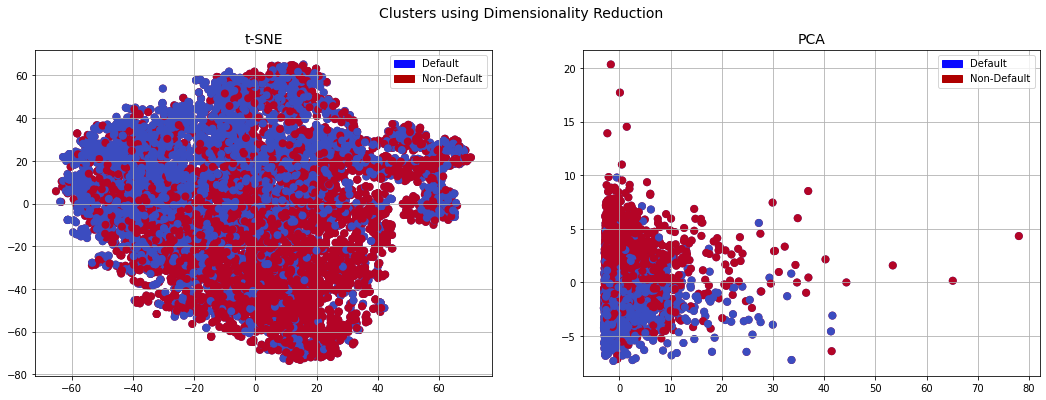

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
# labels = ['Default', 'Non-Default']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Default')
red_patch = mpatches.Patch(color='#AF0000', label='Non-Default')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Default', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Default', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non-Default', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Default', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

In [34]:
new_df.default.value_counts()

1    3449
0    3251
Name: default, dtype: int64

## Classifers

In [35]:
# Undersampling before cross validation (prone to overfit)
X = new_df.drop('default',axis=1)
y = new_df['default']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [38]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    'GradientBoosting':GradientBoostingClassifier()
}

In [39]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 74.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 68.0 % accuracy score
Classifiers:  SVC Has a training score of 74.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 64.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 75.0 % accuracy score


In [42]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNN 
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

# GradientBoosting Classifier
gbt_params = {'learning_rate':[0.01, 0.1, 0.5, 1],
              'n_estimators':[100,200,300,400]}

gbt_tree = GridSearchCV(GradientBoostingClassifier(), gbt_params)
gbt_tree.fit(X_train, y_train)
gbt_clf = gbt_tree.best_estimator_

In [43]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

gbt_score = cross_val_score(gbt_clf, X_train, y_train, cv=5)
print('Gradient Boosting Classifier Cross Validation Score', round(gbt_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  74.01%
Knears Neighbors Cross Validation Score 67.5%
Support Vector Classifier Cross Validation Score 74.25%
DecisionTree Classifier Cross Validation Score 73.02%
Gradient Boosting Classifier Cross Validation Score 75.09%


In [47]:
# We will undersample during cross validating
undersample_X = data.drop('default', axis=1)
undersample_y = data['default']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [18000 18001 18002 ... 93997 93998 93999] Test: [    0     1     2 ... 90797 90798 90799]
Train: [    0     1     2 ... 93997 93998 93999] Test: [18000 18001 18002 ... 91597 91598 91599]
Train: [    0     1     2 ... 93997 93998 93999] Test: [36000 36001 36002 ... 92397 92398 92399]
Train: [    0     1     2 ... 93997 93998 93999] Test: [54000 54001 54002 ... 93197 93198 93199]
Train: [    0     1     2 ... 93197 93198 93199] Test: [72000 72001 72002 ... 93997 93998 93999]
NearMiss Label Distribution: Counter({0: 4000, 1: 4000})


In [50]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

gbt_pred = cross_val_predict(gbt_clf, X_train, y_train, cv=5)

In [51]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Gradient Boosting Classifier: ', roc_auc_score(y_train, gbt_pred))

Logistic Regression:  0.8048975769707751
KNears Neighbors:  0.6770349083978117
Support Vector Classifier:  0.806697798015338
Decision Tree Classifier:  0.7296714760376848
Gradient Boosting Classifier:  0.7515269122243442


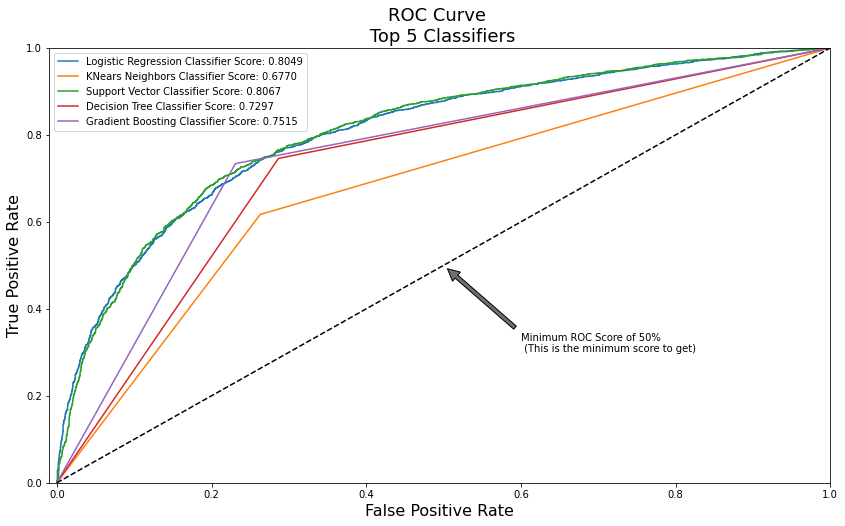

In [53]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
gbt_fpr, gbt_tpr, gbt_threshold = roc_curve(y_train, gbt_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, gbt_fpr, gbt_tpr):
    plt.figure(figsize=(14,8))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(gbt_fpr, gbt_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gbt_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, gbt_fpr, gbt_tpr)
plt.show()

## A Deeper Look into Logistic Regression

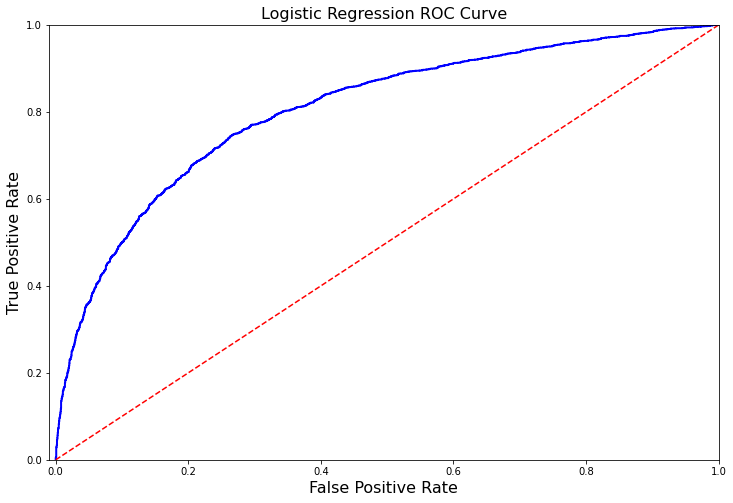

In [54]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.86
Precision Score: 0.60
F1 Score: 0.71
Accuracy Score: 0.63
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.42
Precision Score: 0.06
Recall Score: 0.85
F1 Score: 0.11
---------------------------------------------------------------------------------------------------------------------------------------


## Oversampling with SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 75200 | Length of y (train): 75200
Length of X (test): 18800 | Length of y (test): 18800
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7543351063829787
precision: 0.11771099435324268
recall: 0.7346874999999999
f1: 0.20290638291218124
---------------------------------------------------------------------------------------------------------------------------------------


In [59]:
labels = ['Non-Default', 'Default']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

 Non-Default       0.98      0.76      0.86     18000
     Default       0.12      0.72      0.20       800

    accuracy                           0.75     18800
   macro avg       0.55      0.74      0.53     18800
weighted avg       0.95      0.75      0.83     18800



In [63]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.4183170795440674 sec


# Testing

## Test for logistic regression

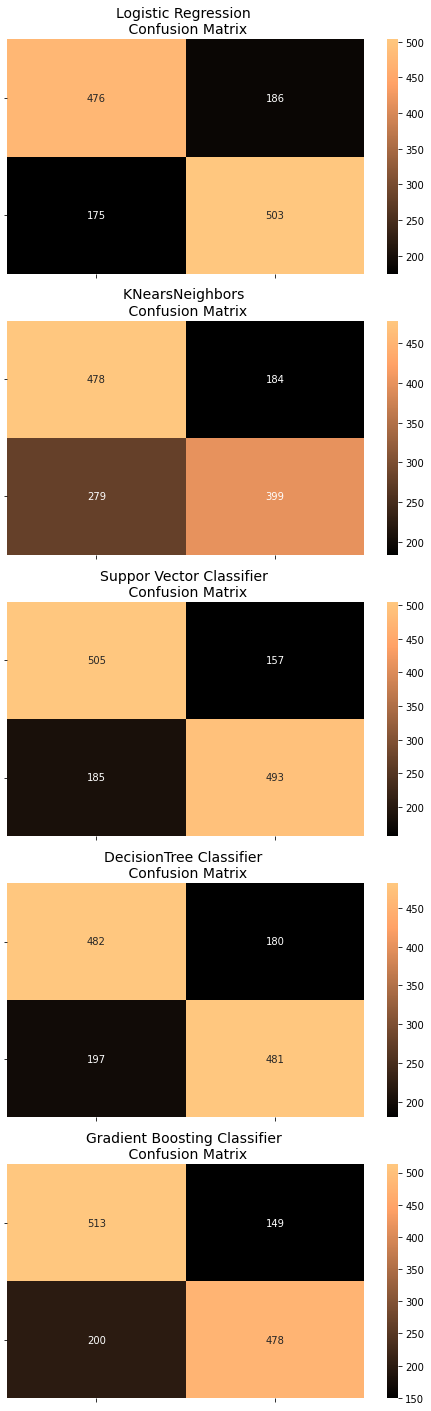

In [67]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_gbt = gbt_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
gbt_cf = confusion_matrix(y_test, y_pred_gbt)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1,figsize=(8,25))


sns.heatmap(log_reg_cf, ax=ax1, annot=True, fmt='g',cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax2, annot=True, fmt='g',cmap=plt.cm.copper)
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax3, annot=True, fmt='g',cmap=plt.cm.copper)
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax3.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax3.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax4, annot=True, fmt='g',cmap=plt.cm.copper)
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax4.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax4.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(gbt_cf, ax=ax5, annot=True, fmt='g',cmap=plt.cm.copper)
ax5.set_title("Gradient Boosting Classifier \n Confusion Matrix", fontsize=14)
ax5.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax5.set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [69]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Gradient Boosting Classifier:')
print(classification_report(y_test, y_pred_gbt))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       662
           1       0.73      0.74      0.74       678

    accuracy                           0.73      1340
   macro avg       0.73      0.73      0.73      1340
weighted avg       0.73      0.73      0.73      1340

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       662
           1       0.68      0.59      0.63       678

    accuracy                           0.65      1340
   macro avg       0.66      0.66      0.65      1340
weighted avg       0.66      0.65      0.65      1340

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       662
           1       0.76      0.73      0.74       678

    accuracy                           0.74      1340
   macro avg       0.75      0.74      0.74      1340
weighted

In [74]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = roc_auc_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = roc_auc_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'AUC-Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['AUC-Score']
final_df.drop('AUC-Score', axis=1, inplace=True)
final_df.insert(1, 'AUC-Score', score)

final_df

,Technique,AUC-Score
0,Random UnderSampling,0.730461
1,Oversampling (SMOTE),0.738194


## Naive Neural Networks on test set

In [142]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape = (n_inputs, ), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [143]:
undersample_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 30)                930       
                                                                 
 dense_63 (Dense)            (None, 32)                992       
                                                                 
 dense_64 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [146]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [191]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=200, shuffle=True, verbose=2)

Epoch 1/200
172/172 - 0s - loss: 0.4591 - accuracy: 0.7819 - val_loss: 0.5698 - val_accuracy: 0.7155 - 190ms/epoch - 1ms/step
Epoch 2/200
172/172 - 0s - loss: 0.4579 - accuracy: 0.7857 - val_loss: 0.5685 - val_accuracy: 0.7155 - 159ms/epoch - 926us/step
Epoch 3/200
172/172 - 0s - loss: 0.4546 - accuracy: 0.7859 - val_loss: 0.5677 - val_accuracy: 0.7080 - 156ms/epoch - 906us/step
Epoch 4/200
172/172 - 0s - loss: 0.4515 - accuracy: 0.7885 - val_loss: 0.5839 - val_accuracy: 0.7192 - 169ms/epoch - 985us/step
Epoch 5/200
172/172 - 0s - loss: 0.4486 - accuracy: 0.7903 - val_loss: 0.5736 - val_accuracy: 0.7164 - 161ms/epoch - 937us/step
Epoch 6/200
172/172 - 0s - loss: 0.4441 - accuracy: 0.7917 - val_loss: 0.5656 - val_accuracy: 0.7090 - 165ms/epoch - 958us/step
Epoch 7/200
172/172 - 0s - loss: 0.4410 - accuracy: 0.8011 - val_loss: 0.5806 - val_accuracy: 0.7108 - 160ms/epoch - 928us/step
Epoch 8/200
172/172 - 0s - loss: 0.4389 - accuracy: 0.7943 - val_loss: 0.5821 - val_accuracy: 0.7136 - 162

Epoch 65/200
172/172 - 0s - loss: 0.3099 - accuracy: 0.8657 - val_loss: 0.7929 - val_accuracy: 0.6735 - 150ms/epoch - 873us/step
Epoch 66/200
172/172 - 0s - loss: 0.3102 - accuracy: 0.8657 - val_loss: 0.8060 - val_accuracy: 0.6744 - 150ms/epoch - 872us/step
Epoch 67/200
172/172 - 0s - loss: 0.3052 - accuracy: 0.8654 - val_loss: 0.8165 - val_accuracy: 0.6632 - 151ms/epoch - 881us/step
Epoch 68/200
172/172 - 0s - loss: 0.3080 - accuracy: 0.8622 - val_loss: 0.7993 - val_accuracy: 0.6763 - 166ms/epoch - 965us/step
Epoch 69/200
172/172 - 0s - loss: 0.3011 - accuracy: 0.8713 - val_loss: 0.8045 - val_accuracy: 0.6707 - 152ms/epoch - 885us/step
Epoch 70/200
172/172 - 0s - loss: 0.3016 - accuracy: 0.8706 - val_loss: 0.8207 - val_accuracy: 0.6642 - 162ms/epoch - 942us/step
Epoch 71/200
172/172 - 0s - loss: 0.3017 - accuracy: 0.8708 - val_loss: 0.8085 - val_accuracy: 0.6772 - 162ms/epoch - 940us/step
Epoch 72/200
172/172 - 0s - loss: 0.2983 - accuracy: 0.8678 - val_loss: 0.8176 - val_accuracy: 0.

Epoch 129/200
172/172 - 0s - loss: 0.2223 - accuracy: 0.9086 - val_loss: 1.1025 - val_accuracy: 0.6632 - 150ms/epoch - 870us/step
Epoch 130/200
172/172 - 0s - loss: 0.2180 - accuracy: 0.9090 - val_loss: 1.1244 - val_accuracy: 0.6595 - 154ms/epoch - 895us/step
Epoch 131/200
172/172 - 0s - loss: 0.2176 - accuracy: 0.9149 - val_loss: 1.1061 - val_accuracy: 0.6716 - 149ms/epoch - 865us/step
Epoch 132/200
172/172 - 0s - loss: 0.2234 - accuracy: 0.9114 - val_loss: 1.1148 - val_accuracy: 0.6660 - 181ms/epoch - 1ms/step
Epoch 133/200
172/172 - 0s - loss: 0.2140 - accuracy: 0.9123 - val_loss: 1.1193 - val_accuracy: 0.6567 - 149ms/epoch - 865us/step
Epoch 134/200
172/172 - 0s - loss: 0.2156 - accuracy: 0.9104 - val_loss: 1.1224 - val_accuracy: 0.6437 - 154ms/epoch - 895us/step
Epoch 135/200
172/172 - 0s - loss: 0.2146 - accuracy: 0.9151 - val_loss: 1.1316 - val_accuracy: 0.6614 - 150ms/epoch - 870us/step
Epoch 136/200
172/172 - 0s - loss: 0.2151 - accuracy: 0.9114 - val_loss: 1.1355 - val_accura

172/172 - 0s - loss: 0.1722 - accuracy: 0.9305 - val_loss: 1.4784 - val_accuracy: 0.6660 - 152ms/epoch - 882us/step
Epoch 193/200
172/172 - 0s - loss: 0.1730 - accuracy: 0.9345 - val_loss: 1.4787 - val_accuracy: 0.6660 - 155ms/epoch - 900us/step
Epoch 194/200
172/172 - 0s - loss: 0.1712 - accuracy: 0.9303 - val_loss: 1.5027 - val_accuracy: 0.6586 - 148ms/epoch - 863us/step
Epoch 195/200
172/172 - 0s - loss: 0.1711 - accuracy: 0.9305 - val_loss: 1.4937 - val_accuracy: 0.6651 - 150ms/epoch - 871us/step
Epoch 196/200
172/172 - 0s - loss: 0.1695 - accuracy: 0.9326 - val_loss: 1.4896 - val_accuracy: 0.6539 - 150ms/epoch - 872us/step
Epoch 197/200
172/172 - 0s - loss: 0.1675 - accuracy: 0.9373 - val_loss: 1.4910 - val_accuracy: 0.6604 - 166ms/epoch - 965us/step
Epoch 198/200
172/172 - 0s - loss: 0.1660 - accuracy: 0.9368 - val_loss: 1.5132 - val_accuracy: 0.6623 - 184ms/epoch - 1ms/step
Epoch 199/200
172/172 - 0s - loss: 0.1746 - accuracy: 0.9303 - val_loss: 1.5593 - val_accuracy: 0.6539 - 1

In [192]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [193]:
undersample_default_predictions = np.argmax(undersample_model.predict(original_Xtest), axis = -1)

In [194]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12285  5715]
 [  138   662]]
Confusion matrix, without normalization
[[18000     0]
 [    0   800]]


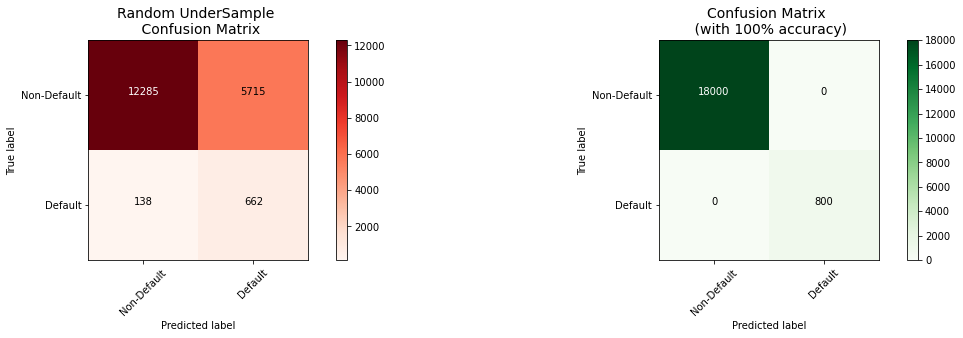

In [195]:
undersample_cm = confusion_matrix(original_ytest, undersample_default_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Non-Default', 'Default']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [173]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [174]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [180]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=200, shuffle=True, verbose=2)

Epoch 1/200
384/384 - 0s - loss: 0.3968 - accuracy: 0.8142 - val_loss: 0.5750 - val_accuracy: 0.7070 - 384ms/epoch - 999us/step
Epoch 2/200
384/384 - 0s - loss: 0.3951 - accuracy: 0.8158 - val_loss: 0.5649 - val_accuracy: 0.7181 - 338ms/epoch - 880us/step
Epoch 3/200
384/384 - 0s - loss: 0.3936 - accuracy: 0.8168 - val_loss: 0.6070 - val_accuracy: 0.6881 - 362ms/epoch - 943us/step
Epoch 4/200
384/384 - 0s - loss: 0.3924 - accuracy: 0.8169 - val_loss: 0.5314 - val_accuracy: 0.7322 - 413ms/epoch - 1ms/step
Epoch 5/200
384/384 - 0s - loss: 0.3902 - accuracy: 0.8189 - val_loss: 0.5424 - val_accuracy: 0.7287 - 362ms/epoch - 943us/step
Epoch 6/200
384/384 - 0s - loss: 0.3890 - accuracy: 0.8190 - val_loss: 0.4967 - val_accuracy: 0.7612 - 357ms/epoch - 931us/step
Epoch 7/200
384/384 - 0s - loss: 0.3873 - accuracy: 0.8196 - val_loss: 0.5377 - val_accuracy: 0.7299 - 356ms/epoch - 927us/step
Epoch 8/200
384/384 - 0s - loss: 0.3864 - accuracy: 0.8208 - val_loss: 0.5912 - val_accuracy: 0.6956 - 345

Epoch 65/200
384/384 - 0s - loss: 0.3477 - accuracy: 0.8433 - val_loss: 0.4791 - val_accuracy: 0.7810 - 332ms/epoch - 864us/step
Epoch 66/200
384/384 - 0s - loss: 0.3474 - accuracy: 0.8435 - val_loss: 0.5266 - val_accuracy: 0.7500 - 334ms/epoch - 869us/step
Epoch 67/200
384/384 - 0s - loss: 0.3474 - accuracy: 0.8439 - val_loss: 0.4175 - val_accuracy: 0.8137 - 345ms/epoch - 899us/step
Epoch 68/200
384/384 - 0s - loss: 0.3469 - accuracy: 0.8435 - val_loss: 0.5069 - val_accuracy: 0.7623 - 336ms/epoch - 875us/step
Epoch 69/200
384/384 - 0s - loss: 0.3465 - accuracy: 0.8441 - val_loss: 0.4018 - val_accuracy: 0.8230 - 337ms/epoch - 877us/step
Epoch 70/200
384/384 - 0s - loss: 0.3465 - accuracy: 0.8434 - val_loss: 0.4614 - val_accuracy: 0.7875 - 339ms/epoch - 884us/step
Epoch 71/200
384/384 - 0s - loss: 0.3465 - accuracy: 0.8436 - val_loss: 0.5153 - val_accuracy: 0.7570 - 364ms/epoch - 948us/step
Epoch 72/200
384/384 - 0s - loss: 0.3453 - accuracy: 0.8438 - val_loss: 0.4870 - val_accuracy: 0.

Epoch 129/200
384/384 - 0s - loss: 0.3372 - accuracy: 0.8487 - val_loss: 0.4967 - val_accuracy: 0.7674 - 368ms/epoch - 957us/step
Epoch 130/200
384/384 - 0s - loss: 0.3372 - accuracy: 0.8489 - val_loss: 0.4173 - val_accuracy: 0.8201 - 337ms/epoch - 878us/step
Epoch 131/200
384/384 - 0s - loss: 0.3384 - accuracy: 0.8483 - val_loss: 0.4603 - val_accuracy: 0.7877 - 340ms/epoch - 886us/step
Epoch 132/200
384/384 - 0s - loss: 0.3363 - accuracy: 0.8494 - val_loss: 0.5081 - val_accuracy: 0.7613 - 336ms/epoch - 875us/step
Epoch 133/200
384/384 - 0s - loss: 0.3369 - accuracy: 0.8495 - val_loss: 0.5359 - val_accuracy: 0.7447 - 334ms/epoch - 870us/step
Epoch 134/200
384/384 - 0s - loss: 0.3372 - accuracy: 0.8489 - val_loss: 0.4527 - val_accuracy: 0.7912 - 342ms/epoch - 891us/step
Epoch 135/200
384/384 - 0s - loss: 0.3369 - accuracy: 0.8493 - val_loss: 0.4725 - val_accuracy: 0.7812 - 372ms/epoch - 970us/step
Epoch 136/200
384/384 - 0s - loss: 0.3370 - accuracy: 0.8489 - val_loss: 0.4738 - val_accu

384/384 - 0s - loss: 0.3318 - accuracy: 0.8529 - val_loss: 0.4650 - val_accuracy: 0.7940 - 362ms/epoch - 942us/step
Epoch 193/200
384/384 - 0s - loss: 0.3331 - accuracy: 0.8533 - val_loss: 0.4616 - val_accuracy: 0.7969 - 379ms/epoch - 986us/step
Epoch 194/200
384/384 - 0s - loss: 0.3324 - accuracy: 0.8527 - val_loss: 0.4275 - val_accuracy: 0.8102 - 365ms/epoch - 950us/step
Epoch 195/200
384/384 - 0s - loss: 0.3326 - accuracy: 0.8532 - val_loss: 0.4739 - val_accuracy: 0.7874 - 355ms/epoch - 925us/step
Epoch 196/200
384/384 - 0s - loss: 0.3321 - accuracy: 0.8533 - val_loss: 0.4592 - val_accuracy: 0.7939 - 355ms/epoch - 924us/step
Epoch 197/200
384/384 - 0s - loss: 0.3326 - accuracy: 0.8537 - val_loss: 0.4700 - val_accuracy: 0.7900 - 355ms/epoch - 924us/step
Epoch 198/200
384/384 - 0s - loss: 0.3317 - accuracy: 0.8534 - val_loss: 0.4452 - val_accuracy: 0.8056 - 368ms/epoch - 957us/step
Epoch 199/200
384/384 - 0s - loss: 0.3316 - accuracy: 0.8530 - val_loss: 0.4899 - val_accuracy: 0.7747 -

In [181]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [182]:
oversample_default_predictions = np.argmax(oversample_model.predict(original_Xtest), axis = -1)

Confusion matrix, without normalization
[[15190  2810]
 [  434   366]]
Confusion matrix, without normalization
[[18000     0]
 [    0   800]]


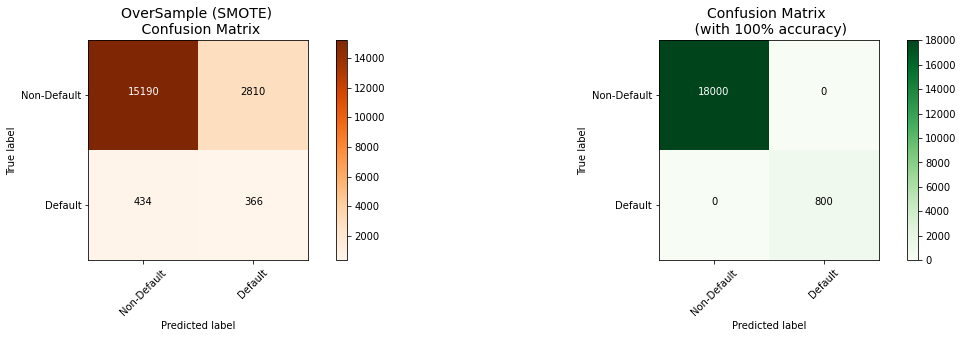

In [190]:
oversample_smote = confusion_matrix(original_ytest, oversample_default_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Non-Default', 'Default']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [196]:
undersample_nn_score = roc_auc_score(original_ytest, undersample_default_predictions)
oversample_nn_score = roc_auc_score(original_ytest, oversample_default_predictions)

method = ['UnderSample', 'OverSample']
auc_score = [undersample_nn_score,oversample_nn_score]

nn_table = pd.DataFrame({'Method':method,
                         'AUC':auc_score})
nn_table

,Method,AUC
0,UnderSample,0.755000
1,OverSample,0.650694


## Other models Test

In [186]:
undersample_knn_pred = knears_neighbors.predict(original_Xtest)
undersample_svc_pred = svc.predict(original_Xtest)
undersample_tree_pred = tree_clf.predict(original_Xtest)
undersample_gbt_pred = gbt_clf.predict(original_Xtest)

undersample_knn_score = roc_auc_score(original_ytest,undersample_knn_pred)
undersample_svc_score = roc_auc_score(original_ytest,undersample_svc_pred)
undersample_tree_score = roc_auc_score(original_ytest,undersample_tree_pred)
undersample_gbt_score = roc_auc_score(original_ytest,undersample_gbt_pred)

In [188]:
model = ['KNN','SVM','Decision Tree','GBT']
under_score = [undersample_knn_score, undersample_svc_score, undersample_tree_score, undersample_gbt_score]

under_table = pd.DataFrame({'Model':model,
                            'AUC':under_score})
under_table

,Model,AUC
0,KNN,0.747667
1,SVM,0.748917
2,Decision Tree,0.733486
3,GBT,0.750958


# Summary

* Faced with such imbalanced dataset, in this notebook, we introduce two methods: UnderSampling by NearMiss and OverSampling by SMOTE.   **Undesampling** takes samples of majority class. **Oversampling** copies of the minority class. They treat the dataset by two different ways but they both create a sub dataframe with a 50/50 ratio of default and non-default.   
  
* While facing imbalanced dataset, accuracy may not be a suitable metric, because the model may simply predict the majority class to have a high enough accuracy. As a result, we are going to use the auc score for the model performance in our case.  
  
* There is also a quite common cross validation overfitting mistake. If you are going to perform undersample of oversample the data, you should not do it before cross-validation. The reason is that doing so will directly infulencing the validation set before implementing cross-validation, leading to a data leakage problem. 
  
* In our case, we mainly inplement the undersampling method. And the model I used in this case includes Logistic Regression, K Nearst Neighbors, Support Vector Machine, Decision Tree and Gradient Boosting. And I also implement a naive neural network. We made a comparison for undersampling method and oversampling method on the logistic regression and neural network.  
  
* Based on the performance dataframe, we can draw the conclusion that, the logistic regression has a higher auc score based on the OverSampling method. And the naive neural network has a higher auc score than the other models based on the UnderSampling method. But since the neural network is quite naive, I am gonna also add the Gradient Boosting Model to validate using val.csv

# Validation

In [198]:
val = pd.read_csv('val.csv')
val.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,22.88,75.59,3367.08,6131.31,41.38,43.08,2.13,102.67,0.500,0.500,...,0.08,0.00,0.05,0.17,0.00,1035.14,158.71,13.28,0.00,1
1,15.94,86.26,5595.00,10867.86,52.29,61.21,3.05,124.94,3.200,2.400,...,0.01,0.00,0.00,0.06,438.50,0.00,72.78,44.88,25.39,1
2,25.16,64.20,4758.44,7818.15,46.28,50.72,2.69,110.16,1.124,0.889,...,0.08,0.02,0.02,0.10,622.70,755.52,102.89,6.24,0.00,1
3,19.50,77.81,5762.27,6290.00,58.14,76.27,2.44,119.92,1.222,1.000,...,0.04,0.00,0.01,0.08,197.55,396.27,76.34,8.44,2.00,1
4,11.11,85.09,11400.50,20936.25,30.00,29.75,0.50,125.89,2.167,1.333,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,1


In [212]:
model = pd.read_csv('model.csv')
model.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [213]:
X_val = val.drop('default',axis=1)
y_val = val['default']

X_model = model.drop('default',axis=1)
y_model = model.drop('default',axis=1)

# In order to avoid data leakage, we use the statistical data from model.csv to scale the valid data
rob_scaler = RobustScaler()
X_scaled_model = rob_scaler.fit_transform(X_model)
X_scaled_val = rob_scaler.transform(X_val)

In [220]:
# Logistic Regression

y_pred_val_lr = best_est.predict(X_scaled_val)

# Performance
val_auc_lr = round(roc_auc_score(y_val, y_pred_val_lr),3)

In [221]:
# Neural Network

y_pred_val_nn = np.argmax(undersample_model.predict(X_scaled_val), axis = -1)

# Performance
val_auc_nn = round(roc_auc_score(y_val, y_pred_val_nn),3)

In [222]:
# Gradient Boosting

y_pred_val_gbt = gbt_clf.predict(X_scaled_val)

# Performance
val_auc_gbt = round(roc_auc_score(y_val, y_pred_val_gbt),3)

In [223]:
model = ['Logistic Regression', 'Neural Network', 'Gradient Boosting']
auc_score = [val_auc_lr, val_auc_nn, val_auc_gbt]

val_table = pd.DataFrame({'Model':model,
                          'Performance':auc_score})
val_table

,Model,Performance
0,Logistic Regression,0.745
1,Neural Network,0.673
2,Gradient Boosting,0.757


In [227]:
pd.DataFrame(y_pred_val_lr).to_csv('results1.csv',index=False,header=False)

In [228]:
pd.DataFrame(y_pred_val_gbt).to_csv('results2.csv',index=False,header=False)